In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

#No pop-ups, all graphs are displayed on the notebook
%matplotlib inline

In [2]:
train_df=pd.read_csv("titanic.csv")
test_df=pd.read_csv("titanic_test.csv")

### Exploring the training dataset

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Pandas Profiling

In [5]:
report = pandas_profiling.ProfileReport(train_df)
#covert profile report as html file
report.to_file("Titanic_train.html")

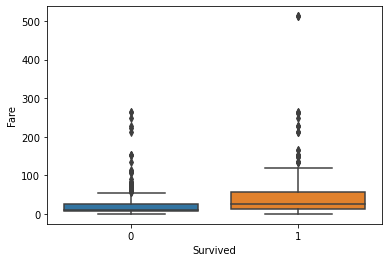

In [6]:
sns.boxplot(x=train_df["Survived"],y=train_df["Fare"])

There is 1 outlier for person who survived

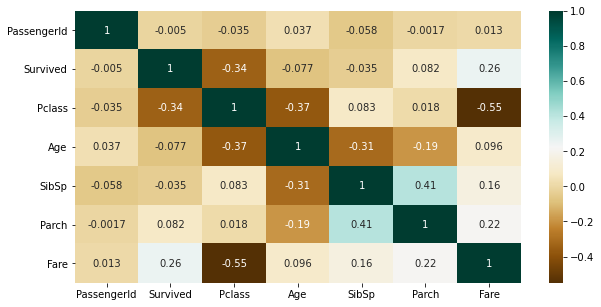

In [7]:
plt.subplots(figsize=(10,5))
sns.heatmap(train_df.corr(),cmap="BrBG",annot=True)

Negative correlation is a relationship between two variables in which one variable increases as other decreases 

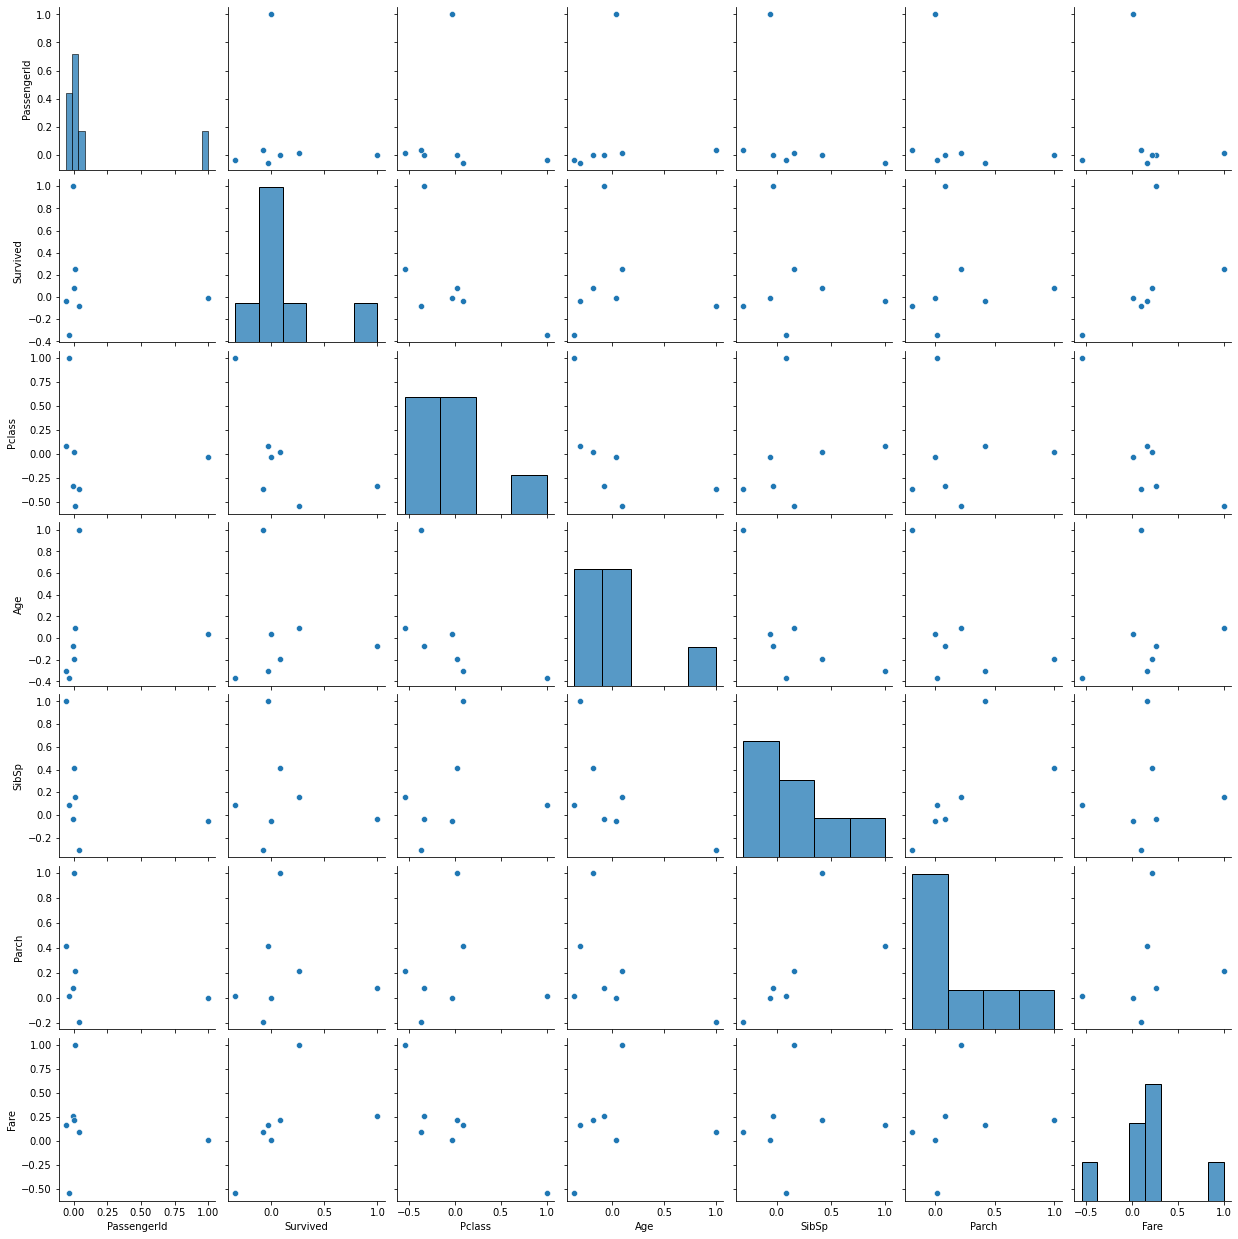

In [8]:
sns.pairplot(train_df.corr())

### Feature Engineering

#### 1)Training Dataset

Encoding the sex categorical variable

In [9]:
train_df["Sex"]=train_df["Sex"].apply(lambda sex:0 if sex=='male' else 1)

Creating features and labels

In [10]:
columns = ["Pclass", "Sex", "Age", "SibSp"]
X=train_df[list(columns)].values
y=train_df["Survived"].values

In [11]:
X

array([[ 3.,  0., 22.,  1.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., nan,  1.],
       [ 1.,  0., 26.,  0.],
       [ 3.,  0., 32.,  0.]])

In [12]:
#X has missing values. So, handling missing values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
X = imp.fit_transform(X)
X

array([[ 3.        ,  0.        , 22.        ,  1.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ],
       [ 3.        ,  1.        , 26.        ,  0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  1.        ],
       [ 1.        ,  0.        , 26.        ,  0.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ]])

### Creating Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

In [15]:
#Creating instance to the DecisionTreeClassifier Class
tree_one=DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
tree_one


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Training our decision tree model

In [16]:
tree_one=tree_one.fit(X,y)

In [17]:
tree_one.feature_importances_

array([0.2662738 , 0.60911193, 0.12461427, 0.        ])

In [18]:
# The feature_importances_ attribute interprets the significance of the predictors included

list(zip(columns,tree_one.feature_importances_))

[('Pclass', 0.26627379767117476),
 ('Sex', 0.6091119294962372),
 ('Age', 0.12461427283258814),
 ('SibSp', 0.0)]

In [19]:
#Model Accuracy
print(tree_one.score(X,y))

0.8069584736251403


In [20]:
# Visualize the decision tree graph
from sklearn import tree
with open("titanic.dot", 'w') as f:
    f = tree.export_graphviz(tree_one, out_file=f, feature_names=columns)

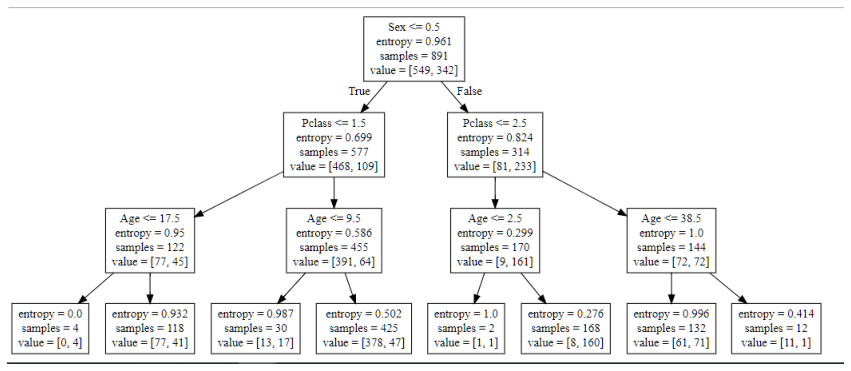

In [21]:
#Displaying the decision tree obtained from http://webgraphviz.com/

import cv2
img=cv2.imread("decision_tree.png")
plt.figure(figsize=(15,7.5))
plt.imshow(img)
plt.axis("off")
plt.show()

### Viewing the test dataset

In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Predictions from Decision Tree Model

In [23]:
# Feature Engineering on test dataset
# Encoding the sex categorical variable 

test_df["Sex"]=test_df["Sex"].apply(lambda sex:0 if sex=='male' else 1)

In [24]:
#Handling missing values in test dataset

X_test = test_df[list(columns)].values
imp_test = SimpleImputer(missing_values=np.nan, strategy='mean')
X_test = imp_test.fit_transform(X_test)
X_test

array([[ 3.        ,  0.        , 34.5       ,  0.        ],
       [ 3.        ,  1.        , 47.        ,  1.        ],
       [ 2.        ,  0.        , 62.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       ,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  0.        ],
       [ 3.        ,  0.        , 30.27259036,  1.        ]])

In [25]:
#MAKING PREDICTiONS
y_pred=tree_one.predict(X_test)

###  Evaluating the Decision Tree model

In [26]:
from sklearn import metrics

pred=tree_one.predict(X)
df_confusion=metrics.confusion_matrix(y,pred)
df_confusion

array([[467,  82],
       [ 90, 252]], dtype=int64)

In [27]:
#Plotting the confusion matrix
# Function to plot the confusion matrix

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')


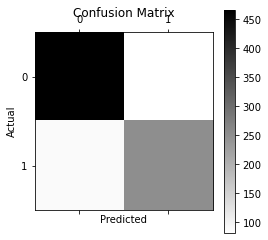

In [28]:
plot_confusion_matrix(df_confusion)

### Parameter Tuning

In [29]:
# Changing depth to 10 and setting min_samples_split to 5
max_depth=10
min_samples_split=5
tree_two=DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_samples_split,random_state=42)
tree_two=tree_two.fit(X,y)

#Printing the score of both the decision tree
print("New Decision Tree Accuracy: ",tree_two.score(X, y))
print("Original Decision Tree Accuracy",tree_one.score(X,y))

New Decision Tree Accuracy:  0.8720538720538721
Original Decision Tree Accuracy 0.8069584736251403


 We have improved our model by fine tuning the parameters. This is called hyperparameters tuning.
 
 

In [30]:
# Making predictions on our Train Data 

pred = tree_two.predict(X)

In [31]:
#Building confusion matrix of our improved model
df_new_confusion=metrics.confusion_matrix(y,pred)
df_new_confusion

array([[512,  37],
       [ 77, 265]], dtype=int64)

In [32]:
def confusion_matrix_heatmap(confusion_mat):
    sns.heatmap(confusion_mat,annot=True,fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

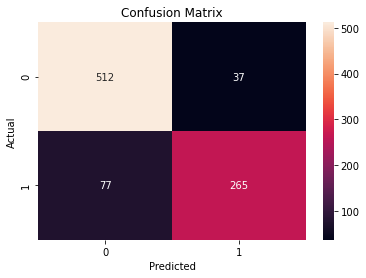

In [33]:
confusion_matrix_heatmap(df_new_confusion)

# Adding new feature and training the model

In [34]:
train_df["family_size"] = train_df.SibSp + train_df.Parch + 1
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1


In [35]:
train_df["family_size"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [36]:
columns=["Pclass", "Sex", "Age", "SibSp","family_size"]
X=train_df[list(columns)].values
y=train_df["Survived"].values

In [37]:
imp_test = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_test.fit_transform(X)


In [40]:
my_tree_three=DecisionTreeClassifier(max_depth=10,min_samples_split=5,random_state=42)
my_tree_three=my_tree_three.fit(X,y)

print("Decision Tree Accuracy",my_tree_three.score(X,y))

Decision Tree Accuracy 0.8787878787878788


In [41]:
# Making predictions
pred = my_tree_three.predict(X)

In [42]:
#Building confusion matrix of our improved model
df_confusion=metrics.confusion_matrix(y,pred)
df_confusion

array([[510,  39],
       [ 69, 273]], dtype=int64)

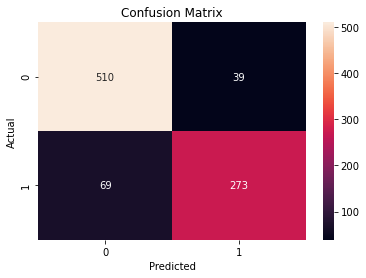

In [43]:
confusion_matrix_heatmap(df_confusion)

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators is number of trees
forest = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 1)

### Training Random Forest Model

In [45]:
forest_one=forest.fit(X,y)

In [46]:
forest_one.score(X,y)

0.9090909090909091

###  Predictions from Random Forest Model

In [47]:
pred=forest_one.predict(X)

In [48]:
list(zip(columns,forest_one.feature_importances_))

[('Pclass', 0.15370913174375933),
 ('Sex', 0.37786144419625545),
 ('Age', 0.34384082032704677),
 ('SibSp', 0.04298666819127107),
 ('family_size', 0.08160193554166748)]

###  Evaluating the Random Forest Model

In [49]:
df_confusion_rf = metrics.confusion_matrix(y, pred)
df_confusion_rf

array([[525,  24],
       [ 57, 285]], dtype=int64)

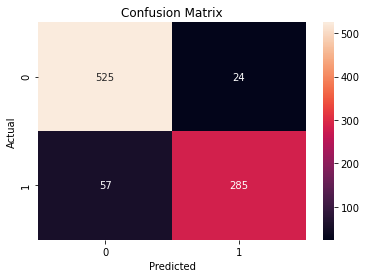

In [50]:
confusion_matrix_heatmap(df_confusion_rf)

# Grid Search

Grid-searching is the process of scanning the data to configure optimal parameters for a given model.

In [51]:
# Different parameters we want to test
max_depth = [5,10,15] 
criterion = ['gini', 'entropy']

In [52]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [53]:
# Building the model

tree_three = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator = tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion))

In [54]:
grid.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [55]:
# Best accuracy score
grid.best_score_

0.8103254769921437

In [56]:
# Best params for the model
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [60]:
# Building the model based on new parameters
tree_three = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, random_state=42)

In [61]:
tree_three.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
# Accuracy Score for new model
tree_three.score(X,y)

0.8900112233445566

# Random Search

Using Randomized Grid Search, we can define a grid of hyperparameters and randomly sample from the grid to get the best combination of values.

In [63]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [64]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [65]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [66]:
forest_two = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42)

In [67]:
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.5s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.5s
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_sa

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [68]:
rf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

A Random Forest model built with this hyperparameters will provide best accuracy

In [69]:
rf_random.best_score_

0.8271604938271606